In [3]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
rev = pd.read_csv('C:/Users/Hp/Documents/csv/amazon_orginal1.csv',error_bad_lines = False, encoding = 'ISO-8859-1')
rev.head(10)

,reviewText
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...
5,So good that I bought another one. Love the h...
6,"I have used monster cables for years, and with..."
7,I now use this cable to run from the output of...
8,Perfect for my Epiphone Sheraton II. Monster ...
9,Monster makes the best cables and a lifetime w...


In [5]:
rev = [x.strip() for x in rev.reviewText]
rev = [ x for x in rev if x]
rev

["Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",
 "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",
 'The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of vo

In [6]:
nlp=spacy.load('en_core_web_sm')

one_block = rev[1]
rev_block = nlp(one_block)
spacy.displacy.render(rev_block,style='ent',jupyter = True)

In [7]:
for token in rev_block:
    print(token,token.pos_)

The DET
product NOUN
does VERB
exactly ADV
as ADP
it PRON
should AUX
and CCONJ
is VERB
quite ADV
affordable ADJ
. PUNCT
I PRON
did AUX
not PART
realized VERB
it PRON
was AUX
double ADV
screened VERB
until ADP
it PRON
arrived VERB
, PUNCT
so ADV
it PRON
was AUX
even ADV
better ADJ
than SCONJ
I PRON
had AUX
expected VERB
. PUNCT
As ADP
an DET
added VERB
bonus NOUN
, PUNCT
one NUM
of ADP
the DET
screens NOUN
carries VERB
a DET
small ADJ
hint NOUN
of ADP
the DET
smell NOUN
of ADP
an DET
old ADJ
grape NOUN
candy NOUN
I PRON
used VERB
to PART
buy VERB
, PUNCT
so CCONJ
for ADP
reminiscent ADJ
's PART
sake NOUN
, PUNCT
I PRON
can AUX
not PART
stop VERB
putting VERB
the DET
pop NOUN
filter NOUN
next ADV
to ADP
my PRON
nose NOUN
and CCONJ
smelling VERB
it PRON
after ADP
recording VERB
. PUNCT
: PUNCT
DIf NOUN
you PRON
needed VERB
a DET
pop NOUN
filter NOUN
, PUNCT
this DET
will AUX
work VERB
just ADV
as ADV
well ADV
as ADP
the DET
expensive ADJ
ones NOUN
, PUNCT
and CCONJ
it PRON
may AUX
even AD

In [8]:
nouns_verbs= [token for token in rev_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[0:10])

[product, does, is, realized, screened, arrived, expected, added, bonus, screens]


In [9]:
afinn = pd.read_csv('C:/Users/Hp/Documents/csv/afinn.csv',sep = ',', encoding = 'latin-1')
afinn[0:15]

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [10]:
import nltk
nltk.download('punkt')

from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(rev))
sentence[0:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["Not much to write about here, but it does exactly what it's supposed to.",
 'filters out the pop sounds.',
 'now my recordings are much more crisp.',
 "it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording.",
 ':DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product!',
 ':] The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable red

In [11]:
sent_df = pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,"Not much to write about here, but it does exac..."
1,filters out the pop sounds.
2,now my recordings are much more crisp.
3,it is one of the lowest prices pop filters on ...
4,":DIf you needed a pop filter, this will work j..."
...,...
51450,This is the only complaint I have about these ...
51451,If the unwound strings were a tiny bit brighte...
51452,"As it stands, I give them 4.5 stars... not a b..."
51453,I put these on a jumbo and it definitely accen...


In [12]:
affinity_score = afinn.set_index('word')['value'].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [13]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_score

def calculate_emotion(text: str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [14]:
#testing
calculate_emotion(text = 'this is really good product')

3

In [15]:
sent_df['emotion_value'] = sent_df['sentence'].apply(calculate_emotion)
sent_df

,sentence,emotion_value
0,"Not much to write about here, but it does exac...",0
1,filters out the pop sounds.,0
2,now my recordings are much more crisp.,0
3,it is one of the lowest prices pop filters on ...,-1
4,":DIf you needed a pop filter, this will work j...",2
...,...,...
51450,This is the only complaint I have about these ...,0
51451,If the unwound strings were a tiny bit brighte...,1
51452,"As it stands, I give them 4.5 stars... not a b...",5
51453,I put these on a jumbo and it definitely accen...,0


In [24]:
sent_df['Index'] = range(0,len(sent_df))
first_column = sent_df.pop('Index')
sent_df.insert(0,'Index',first_column)

sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)

sent_df

,Index,sentence,emotion_value,word_count
0,0,"Not much to write about here, but it does exac...",0,14
1,1,filters out the pop sounds.,0,5
2,2,now my recordings are much more crisp.,0,7
3,3,it is one of the lowest prices pop filters on ...,-1,98
4,4,":DIf you needed a pop filter, this will work j...",2,30
...,...,...,...,...
51450,51450,This is the only complaint I have about these ...,0,10
51451,51451,If the unwound strings were a tiny bit brighte...,1,14
51452,51452,"As it stands, I give them 4.5 stars... not a b...",5,24
51453,51453,I put these on a jumbo and it definitely accen...,0,16


<AxesSubplot:xlabel='Index', ylabel='emotion_value'>

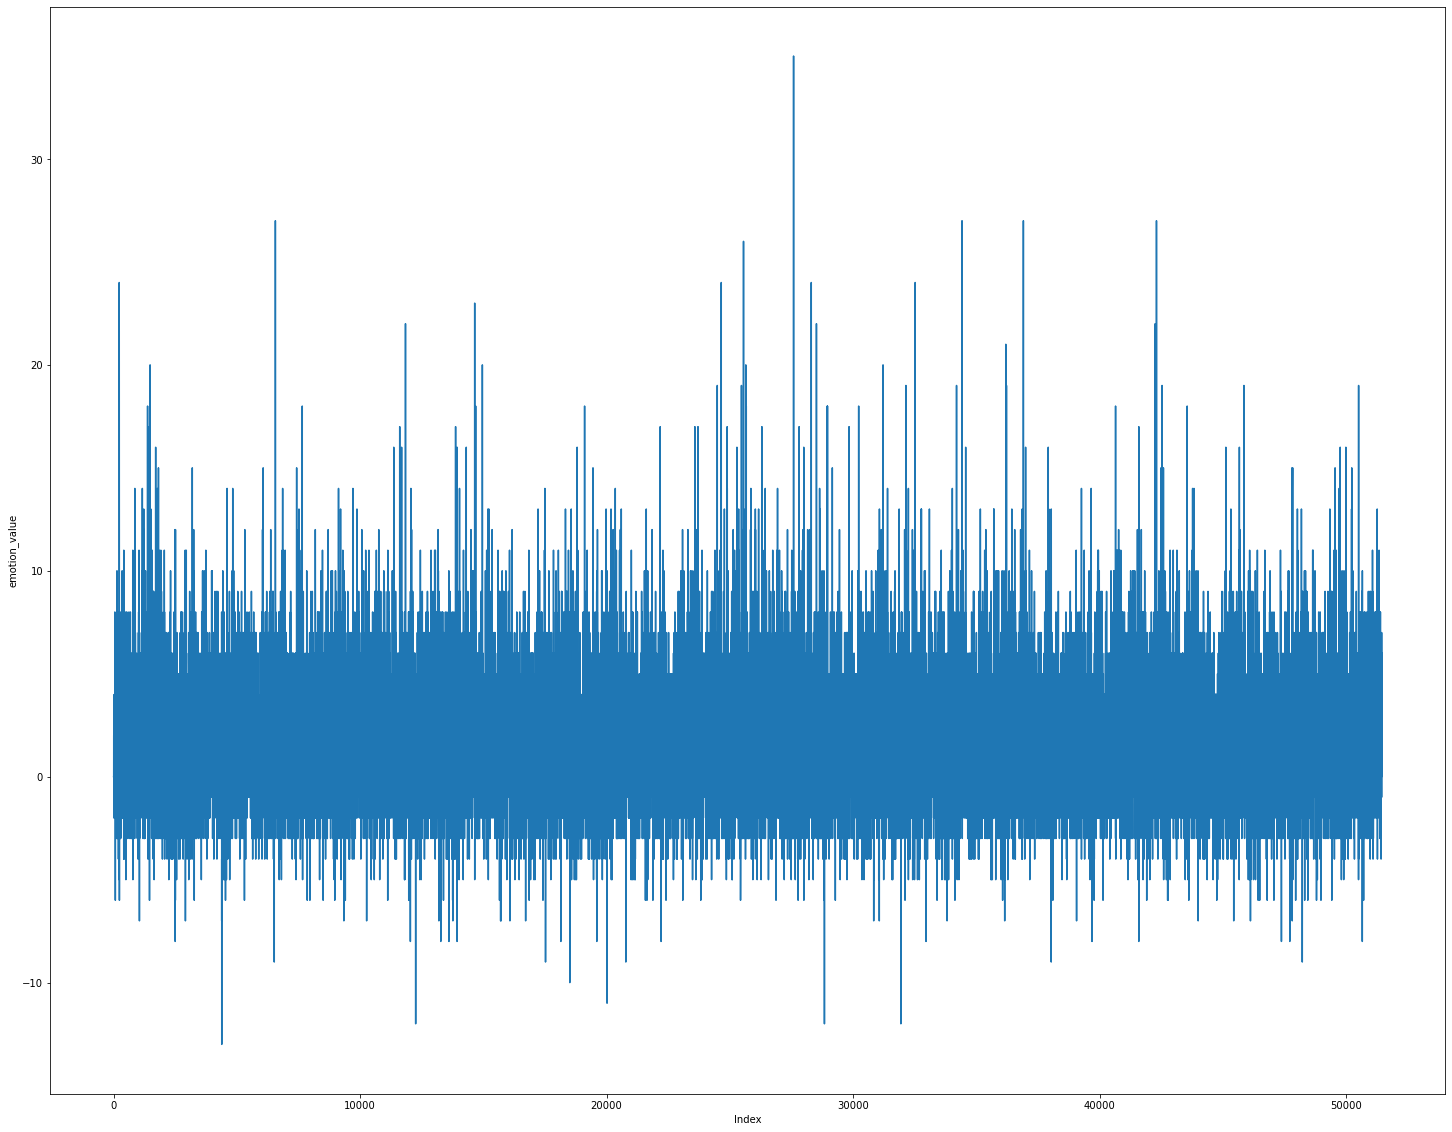

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))
sns.lineplot(y='emotion_value',x='Index',data=sent_df)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emotion_value', ylabel='Density'>

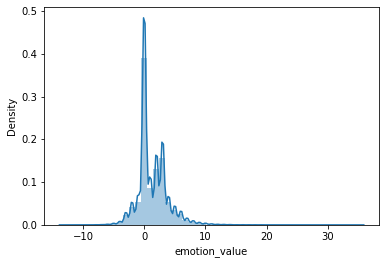

In [20]:
import seaborn as sns
sns.distplot(sent_df["emotion_value"])

<AxesSubplot:title={'center':'Sentence emotion value to sentence word count'}, xlabel='word_count', ylabel='emotion_value'>

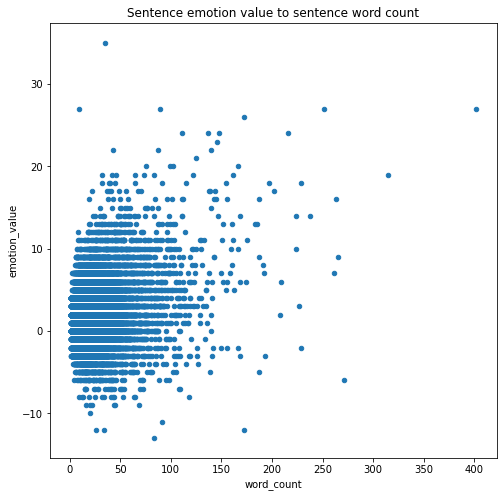

In [25]:
sent_df.plot.scatter(x='word_count', y='emotion_value', figsize=(8,8), title='Sentence emotion value to sentence word count')